# Projet Data Exploration

## Etienne Aubry et Charles-Meldhine Madi Mnemoi

L'objectif de ce projet est d'étudier le jeu de données `Esperancevie.csv` qui regroupe des indicateurs sur l'espérance de vie de 196 pays.



## Sommaire 

- Analyses univariées
- Analyses bivariées
    - Quanti x Quanti
    - Quanti x Quali
    - Quali x Quali
- Analyse multivariée

Commençons par charger le jeu de données et les packages nécessaires :

In [1]:
import pandas as pd # Manipulation de tableaux de données
import matplotlib.pyplot as plt # Création de graphiques
import seaborn as sns # Création de graphiques de façon plus simple
from prince import PCA # Analyse en composantes principales

from utils import display_side_by_side # Fonction pour afficher plusieurs tableaux côte à côte

sns.set()

dataset = pd.read_csv(
    filepath_or_buffer="https://raw.githubusercontent.com/cmnemoi/Projet_Data_Exploration/main/Esperancevie.csv",
    index_col="PAYS", # On définit la colonne Pays comme index
    decimal=",", # On définit la virgule comme séparateur décimal
    sep=";", # On définit le point-virgule comme séparateur de colonne
    encoding = "ISO-8859-1"
)

# Description des données

In [2]:
print("Il y a", dataset.shape[0], "pays dans le dataset et", dataset.shape[1], "variables dans le dataset.")

Il y a 196 pays dans le dataset et 7 variables dans le dataset.


In [3]:
dataset.head()

,TNAT,TMORT,EV,T65,NBENF,TCR,CONT
PAYS,,,,,,,
Afghanistan,45.49,18.60,44.97,2.254847,6.35,3.33,ASIE
AfriquedSud,21.22,15.24,52.28,4.737313,2.45,0.57,AFRIQUE
Albanie,15.02,6.52,77.02,9.907497,1.85,0.51,EUROPE
Algerie,20.48,4.91,73.13,4.690466,2.30,1.48,AFRIQUE
Allemagne,7.95,10.77,80.33,20.670035,1.33,-0.16,EUROPE


Les variables sont les suivantes :
 - `TNAT` : variable quantitative qui représente le taux de natalité pour 1000 habitants
 - `TMORT` : variable quantitative qui représente le taux de mortalité pour 1000 habitants
 - `EV` : variable quantitative qui représente l'espérance de vie en années
 - `T65` : variable quantitative qui représente le taux de personnes de plus de 65 ans pour 100 habitants
 - `NBENF` : variable quantitative qui représente le nombre d'enfants par femme
 - `TCR` : variable quantitative qui représente le taux de croissance de la population pour 1000 habitants
 - `CONT` : variable qualitative qui représente le continent

Pour varier les plaisirs, codons le nombre d'enfants par femme `NBENF` comme variable qualitative avec les modalités suivantes :
 - `NBENF` < 1.85 : `Faible`
 - 1.85 <= `NBENF` < 3.6 : `Moyen`
 - `NBENF` >= 3.6 : `Elevé`

In [4]:
dataset.NBENF = dataset.NBENF.apply(
    lambda nb_enfants: "Faible" if nb_enfants < 1.85 else "Moyen" if nb_enfants < 3.6 else "Elevé"
)

# Indiquons à Pandas que ces variables sont catégorielles
dataset.NBENF = dataset.NBENF.astype("category")
dataset.CONT = dataset.CONT.astype("category")

In [5]:
dataset.dtypes

TNAT      float64
TMORT     float64
EV        float64
T65       float64
NBENF    category
TCR       float64
CONT     category
dtype: object

In [6]:
quantitative_variables = dataset.select_dtypes(include=["float64", "int64"]).columns
qualitative_variables = dataset.select_dtypes(include=["category"]).columns

# Analyses univariées

Commençons par un résumé des données de chaque variable :

In [7]:
display_side_by_side(*[pd.DataFrame(dataset[variable].describe()).T for variable in dataset.columns])

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 TNAT 
 196.0 
 21.373061 
 10.262112 
 7.7 
 12.555 
 19.38 
 28.1675 
 51.99 
 
 
 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 TMORT 
 196.0 
 8.529286 
 3.528179 
 1.52 
 5.935 
 7.79 
 10.375 
 18.6 
 
 
 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 EV 
 196.0 
 69.701429 
 9.87159 
 44.97 
 64.1225 
 72.605 
 76.855 
 83.37 
 
 
 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 T65 
 196.0 
 7.764565 
 5.278277 
 1.044821 
 3.55445 
 5.787767 
 12.188295 
 23.275033 
 
 
 
 
 
 
 count 
 unique 
 top 
 freq 
 
 
 
 
 NBENF 
 196 
 3 
 Moyen 
 95 
 
 
 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 TCR 
 196.0 
 1.273827 
 1.004232 
 -0.8 
 0.42 
 1.195 
 2.0725 
 3.78 
 
 
 
 
 
 
 count 
 unique 
 top 
 freq 
 
 
 
 
 CONT 
 196 
 6 
 AFRIQUE 
 55

Ainsi que des graphiques de distribution de chaque variable :

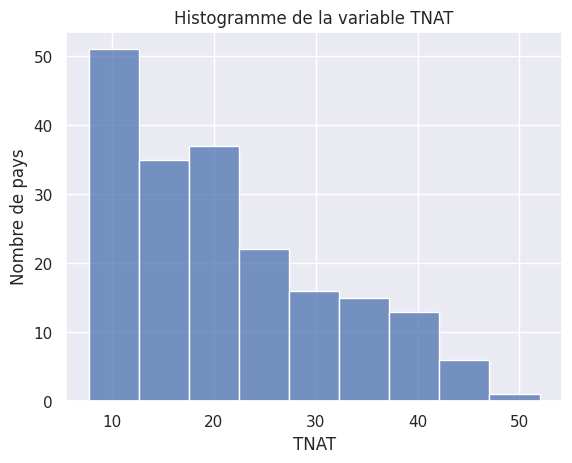

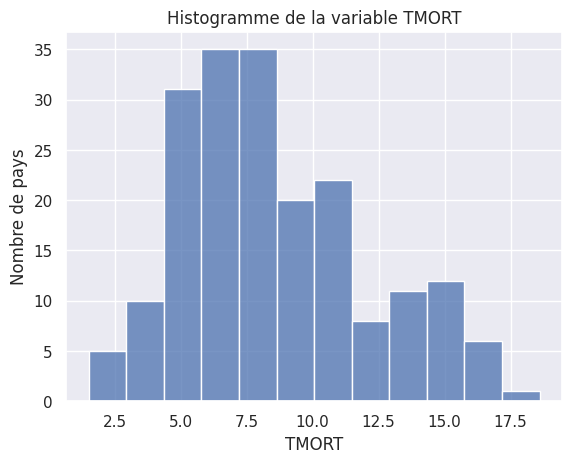

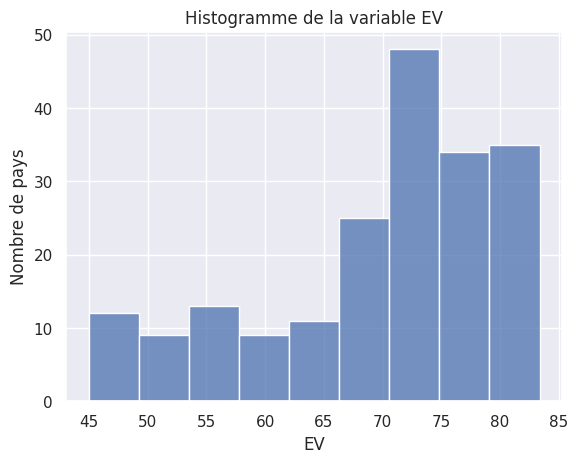

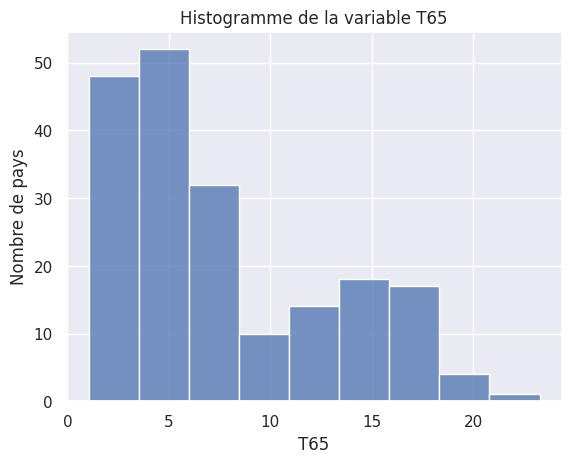

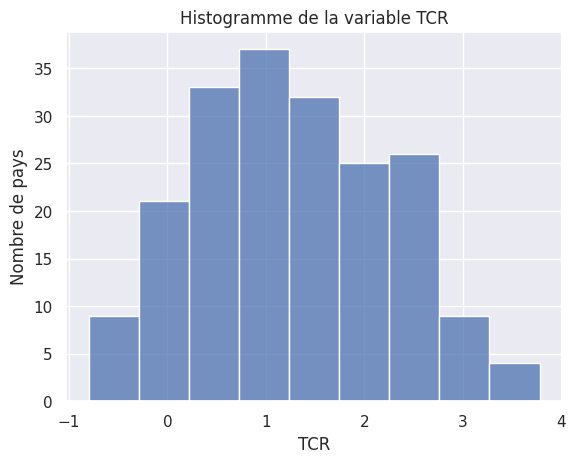

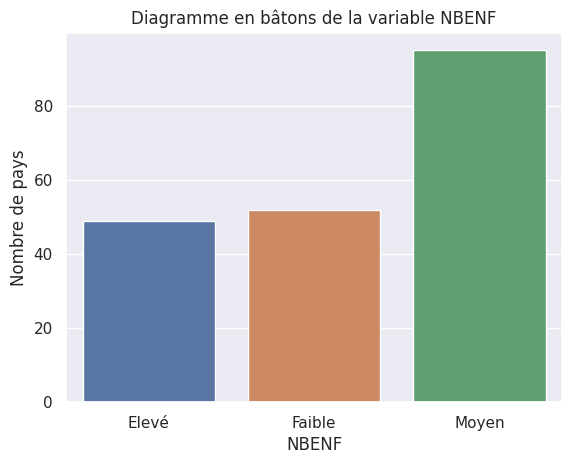

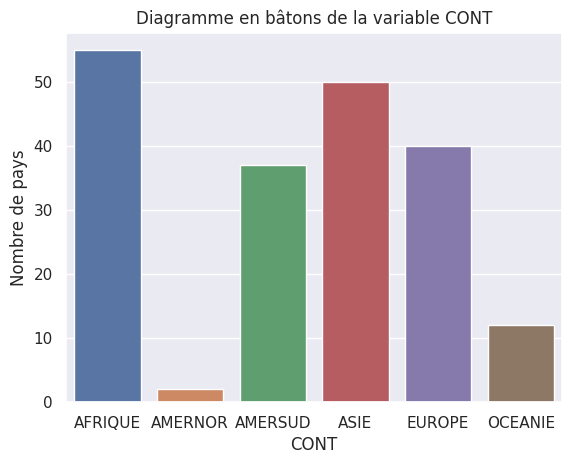

In [10]:
for variable in quantitative_variables:
    sns.histplot(dataset[variable])
    plt.title(f"Histogramme de la variable {variable}")
    plt.xlabel(variable)
    plt.ylabel("Nombre de pays")
    plt.show()

for variable in qualitative_variables:
    sns.countplot(data = dataset, x = variable)
    plt.title(f"Diagramme en bâtons de la variable {variable}")
    plt.xlabel(variable)
    plt.ylabel("Nombre de pays")
    plt.show()

Quelques observations :
- Le taux de natalité `TNAT` moyen est de 21.3 pour mille habitants, avec un écart-type de 10.26, environ 50% de la moyenne. Cela signifie que les taux de natalité **varient beaucoup d'un pays à l'autre**, comme on peut le voir sur l'histogramme.
La médiane est de 19.5 pour mille, ce qui est légèrement inférieur à la moyenne (la distribution est légèrement asymétrique à droite). Cela signifie que **la majorité des pays** ont un taux de natalité inférieur à la moyenne, mais qu'**une petite quantité de pays** a un taux de natalité **très élevé** (maximum de 51.99 pour mille).


- On observe une asymétrie similaire pour la plupart des variables quantitatives, avec une moyenne légèrement supérieure à la médiane, sauf pour `EV` qui est asymétrique à gauche : cela siginifie qu'**une majorité des pays** ont une espérance de vie supérieure à 71.5 ans comme l'indique la médiane, mais qu'**une petite quantité de pays** a une espérance de vie **très faible** (minimum de 44.97 ans), ce qui tire la moyenne vers le bas.

- Le taux de croissance de la population `TCR` est la seule à avoir une distribution symétrique (moyenne très proche de la médiane), ce qui signifie qu'il y a autant de pays avec un taux de croissance **de part et d'autres de la moyenne**.

- Il y a très peu de pays d'Amérique du Nord et d'Océanie dans les données d'après le diagramme en bâtons, tandis que les pays africains sont les plus représentés.